In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('antfile17.csv')

In [5]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Kernel: linear
Accuracy: 79.46%
Confusion Matrix:
[[163   3]
 [ 43  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       166
           1       0.83      0.26      0.39        58

    accuracy                           0.79       224
   macro avg       0.81      0.62      0.64       224
weighted avg       0.80      0.79      0.75       224



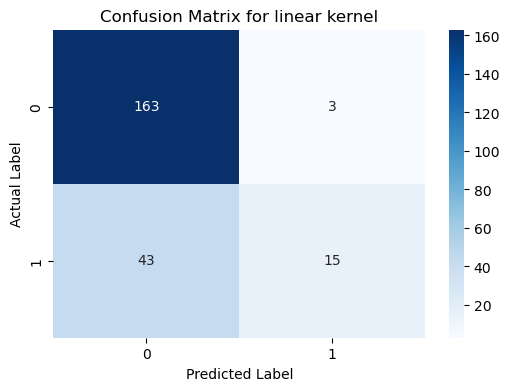

Kernel: poly
Accuracy: 79.02%
Confusion Matrix:
[[164   2]
 [ 45  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       166
           1       0.87      0.22      0.36        58

    accuracy                           0.79       224
   macro avg       0.83      0.61      0.62       224
weighted avg       0.81      0.79      0.74       224



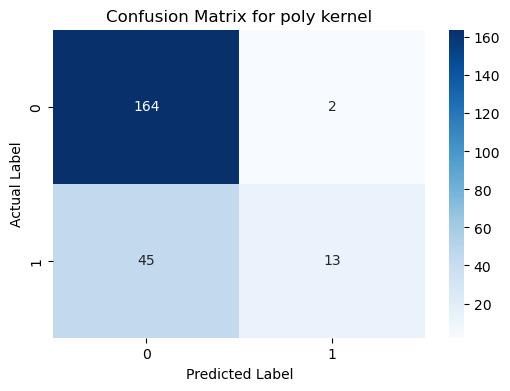

Kernel: rbf
Accuracy: 77.23%
Confusion Matrix:
[[161   5]
 [ 46  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       166
           1       0.71      0.21      0.32        58

    accuracy                           0.77       224
   macro avg       0.74      0.59      0.59       224
weighted avg       0.76      0.77      0.72       224



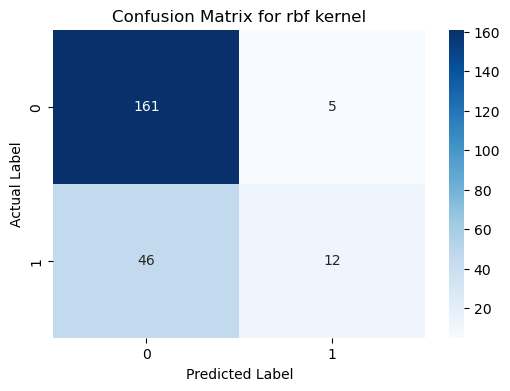

In [10]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    
    svm_model.fit(X_train, y_train)
    
    y_pred = svm_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results[kernel] = {'accuracy': acc, 'confusion_matrix': cm, 'classification_report': cr}
    
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{cr}")
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {kernel} kernel")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [11]:
print("\nSummary of SVM results for different kernels:")
for kernel in kernels:
    print(f"Kernel: {kernel}, Accuracy: {results[kernel]['accuracy'] * 100:.2f}%")


Summary of SVM results for different kernels:
Kernel: linear, Accuracy: 79.46%
Kernel: poly, Accuracy: 79.02%
Kernel: rbf, Accuracy: 77.23%
